In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
x_train.shape

(60000, 28, 28)

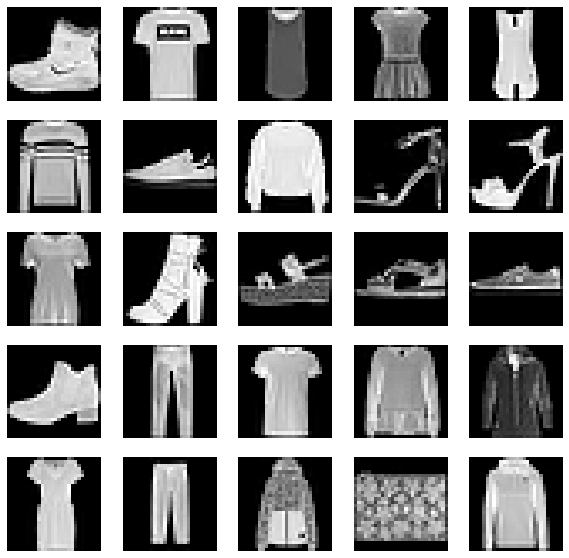

In [4]:
# Display some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# Convert the labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Build the model
model = keras.Sequential([
    layers.Reshape(target_shape=(28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=num_classes, activation='softmax')
])


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 30s 16ms/step - loss: 0.4489 - accuracy: 0.8403 - val_loss: 0.3560 - val_accuracy: 0.8753
Epoch 2/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.3100 - accuracy: 0.8907 - val_loss: 0.2999 - val_accuracy: 0.8945
Epoch 3/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2600 - accuracy: 0.9058 - val_loss: 0.2714 - val_accuracy: 0.9042
Epoch 4/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2291 - accuracy: 0.9165 - val_loss: 0.3045 - val_accuracy: 0.8963
Epoch 5/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2040 - accuracy: 0.9252 - val_loss: 0.2553 - val_accuracy: 0.9102
Epoch 6/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1811 - accuracy: 0.9336 - val_loss: 0.2620 - val_accuracy: 0.9100
Epoch 7/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.1617 - accuracy: 0.9410 - val_loss: 0.2757 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9075999855995178
